In [228]:
# Imports
import pandas as pd
from sklearn.feature_selection import VarianceThreshold, f_regression, mutual_info_regression, SelectKBest
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from functools import partial

In [229]:
## Example Data Frame
df = pd.DataFrame(data={
    'edu_goal': ['bachelors', 'bachelors', 'bachelors', 'masters', 'masters', 'masters', 'masters', 'phd', 'phd', 'phd'],
    'hours_study': [1, 2, 3, 3, 3, 4, 3, 4, 5, 5],
    'hours_TV': [4, 3, 4, 3, 2, 3, 2, 2, 1, 1],
    'hours_sleep': [10, 10, 8, 8, 6, 6, 8, 8, 10, 10],
    'height_cm': [155, 151, 160, 160, 156, 150, 164, 151, 158, 152],
    'grade_level': [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
    'exam_score': [71, 72, 78, 79, 85, 86, 92, 93, 99, 100]
})

In [230]:
df

,edu_goal,hours_study,hours_TV,hours_sleep,height_cm,grade_level,exam_score
0,bachelors,1,4,10,155,8,71
1,bachelors,2,3,10,151,8,72
2,bachelors,3,4,8,160,8,78
3,masters,3,3,8,160,8,79
4,masters,3,2,6,156,8,85
5,masters,4,3,6,150,8,86
6,masters,3,2,8,164,8,92
7,phd,4,2,8,151,8,93
8,phd,5,1,10,158,8,99
9,phd,5,1,10,152,8,100


In [231]:
# Target value is exam_score (i.e. what we want to predict)
# other vars are features.
x = df.drop(columns=['exam_score'])
x

,edu_goal,hours_study,hours_TV,hours_sleep,height_cm,grade_level
0,bachelors,1,4,10,155,8
1,bachelors,2,3,10,151,8
2,bachelors,3,4,8,160,8
3,masters,3,3,8,160,8
4,masters,3,2,6,156,8
5,masters,4,3,6,150,8
6,masters,3,2,8,164,8
7,phd,4,2,8,151,8
8,phd,5,1,10,158,8
9,phd,5,1,10,152,8


In [232]:
y = df.exam_score
y

0     71
1     72
2     78
3     79
4     85
5     86
6     92
7     93
8     99
9    100
Name: exam_score, dtype: int64

In [233]:
## Variance Threshold
# - basic
# - removes features that have low variance (which don't contribute much to a model)
# This only works on numeric values, so we'd need to remove non-numerics. 

# drop edu_goal (not numeric)
x_numeric = x.drop(columns=['edu_goal'])
x_numeric

,hours_study,hours_TV,hours_sleep,height_cm,grade_level
0,1,4,10,155,8
1,2,3,10,151,8
2,3,4,8,160,8
3,3,3,8,160,8
4,3,2,6,156,8
5,4,3,6,150,8
6,3,2,8,164,8
7,4,2,8,151,8
8,5,1,10,158,8
9,5,1,10,152,8


In [234]:
# Use Var Threshold to drop all features w/ N variance (0 by default)
n = 0
selector = VarianceThreshold(threshold=n)
selector.fit_transform(x_numeric)

array([[  1,   4,  10, 155],
       [  2,   3,  10, 151],
       [  3,   4,   8, 160],
       [  3,   3,   8, 160],
       [  3,   2,   6, 156],
       [  4,   3,   6, 150],
       [  3,   2,   8, 164],
       [  4,   2,   8, 151],
       [  5,   1,  10, 158],
       [  5,   1,  10, 152]])

In [235]:
# (Get indices of selected features)
selected_indexes = selector.get_support(indices=True)
selected_indexes

array([0, 1, 2, 3])

In [236]:
# use indices to get the selected columns
selected_columns = list(x_numeric.columns[selected_indexes])
selected_columns

['hours_study', 'hours_TV', 'hours_sleep', 'height_cm']

In [237]:
# update our x_numeric to retain only the selected features
x_selected = x_numeric[selected_columns]
x_selected

,hours_study,hours_TV,hours_sleep,height_cm
0,1,4,10,155
1,2,3,10,151
2,3,4,8,160
3,3,3,8,160
4,3,2,6,156
5,4,3,6,150
6,3,2,8,164
7,4,2,8,151
8,5,1,10,158
9,5,1,10,152


In [238]:
# add our categorical column (edu_goal) back into the data_frame to re-construct it. 
x = x[['edu_goal'] + selected_columns]
x

,edu_goal,hours_study,hours_TV,hours_sleep,height_cm
0,bachelors,1,4,10,155
1,bachelors,2,3,10,151
2,bachelors,3,4,8,160
3,masters,3,3,8,160
4,masters,3,2,6,156
5,masters,4,3,6,150
6,masters,3,2,8,164
7,phd,4,2,8,151
8,phd,5,1,10,158
9,phd,5,1,10,152


# Pearson's Correlation Coefficient

In [239]:

## Useful for measuring the linear relationship between 2 numeric, continous variables
# - coef ~=  1 => positive correlation
# - coef ~= -1 => negative correlation
# - coef  =  0 => no correlation



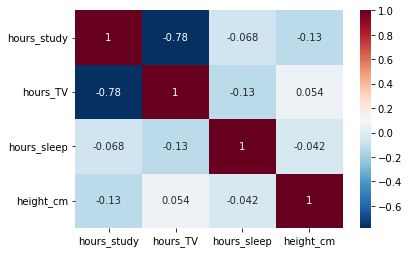

In [240]:
# Correlation Matrix
corr_matrix = x.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
plt.show()

In [241]:
# identify highly correlated vars based on our threshold
corr_threshold = 0.7

# Loop over bottom diagonal of matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            print(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])

hours_TV hours_study -0.780763315142435


In [242]:
## Analysis
# These two variables are HIGHLY correlated. 
# A student who watches a lot of tv, studies less (== NEGATIVE CORRELATION)
#
# Correlation is redundant information, so we can remove one of the variables.
#
#  Which one? 
#  - look at correlation w/ target variable and remove the one less associated w/ the target

# Correlation Between Feature and Target

In the case of Pearson’s correlation, this is especially useful if we intend to fit a linear model, which assumes a linear relationship between the target and predictor variables

In [243]:
# create a new df w/ numeric columns only, and reconstruct it to have exam_score
x_y = x_selected.copy()
x_y['exam_score'] = y
x_y

,hours_study,hours_TV,hours_sleep,height_cm,exam_score
0,1,4,10,155,71
1,2,3,10,151,72
2,3,4,8,160,78
3,3,3,8,160,79
4,3,2,6,156,85
5,4,3,6,150,86
6,3,2,8,164,92
7,4,2,8,151,93
8,5,1,10,158,99
9,5,1,10,152,100


In [244]:
# generate new correlation matrix
corr_matrix_x_y = x_y.corr()

In [245]:
# isolate the column corresponding to our target, to determine how strongly each feature is correlated w/ it
corr_target = corr_matrix_x_y[['exam_score']].drop(labels=['exam_score'])

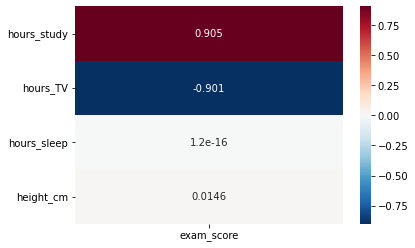

In [246]:
# plot it out
sns.heatmap(corr_target, annot=True, fmt='0.3', cmap='RdBu_r')
plt.show()

### Analysis:

**hours_study** is +correlated w/ **exam_score**
**hours_TV** is -correlated w/ **exam_score**

This makes sense because of the relationship we established between **hours_study** and **hours_TV**

**hours_study** has a stronger correlation, so we can drop **hours_TV**


In [247]:
x = x.drop(columns=['hours_TV'])
x

,edu_goal,hours_study,hours_sleep,height_cm
0,bachelors,1,10,155
1,bachelors,2,10,151
2,bachelors,3,8,160
3,masters,3,8,160
4,masters,3,6,156
5,masters,4,6,150
6,masters,3,8,164
7,phd,4,8,151
8,phd,5,10,158
9,phd,5,10,152


### Analysis

**hours_sleep** and **height_cm** don't seem to be correlated w/ **exam_score**. 
- Might not be good precitors? 
- Could be removed as *uninformative*

Before doing so it is recommended to check for any non-linear associations between remaining features and the target variables. 

## F-regression()

alternative approach for assessing the correlation between variables. Instead of generating the full correlation matrix, we could use the f_regression() function find the F-statistic for a model with each predictor on its own. 


The F-statistic will be larger (and p-value will be smaller) for predictors that are more highly correlated with the target variable, thus it will perform the same filtering:

In [248]:
f_regression(x_selected, y)

(array([3.61362007e+01, 3.44537037e+01, 0.00000000e+00, 1.70259066e-03]),
 array([3.19334945e-04, 3.74322763e-04, 1.00000000e+00, 9.68097878e-01]))

### Analysis

The function returns the F-statistic in the first array and the p-value in the second. As seen, the result is consistent with what we had observed in the correlation matrix — the stronger the correlation (either positive or negative) between the feature and target, the higher the corresponding F-statistic and lower the p-value

# Mutual Information

Measure of dependence between 2 vars. Used to gauge how much a feature contributes to the prediction of a target var. 

Similar to Pearson's correlation, but unlike Pearson, it's not limited to detecting linear associations. 

NOTE: It also supports discrete features/target unlike correlation. 
(Categorical variables must be numerically encoded first)

In [249]:
# Create LabelEncoder instance
le = LabelEncoder()

# copy X, encode our categorical var numerically, and then print it out to show the change.
x_encoded = x.copy()
x_encoded['edu_goal'] = le.fit_transform(x['edu_goal'])
x_encoded

,edu_goal,hours_study,hours_sleep,height_cm
0,0,1,10,155
1,0,2,10,151
2,0,3,8,160
3,1,3,8,160
4,1,3,6,156
5,1,4,6,150
6,1,3,8,164
7,2,4,8,151
8,2,5,10,158
9,2,5,10,152


In [250]:
## Compute mutual information between each feature and 'exam_score'.
# - we use mutual_info_regression()  because the target value is continuous
# - if it had been DISCRETE, we'd use mutual_info_classif()
#
# (random_state parameter is provided in order to obtain reproducible results)
mutual_info_regression(x_encoded, y, random_state=68)

array([0.50396825, 0.40896825, 0.06896825, 0.        ])

In [251]:
# The results are continuous, but our categorical var was discrete
# fix it by providing the index position(s) of the discrete categorical vars that
# had been numerically encoded, in order to ensure the "meaning" of the encoding
# isn't misunderstood. 
mutual_info_regression(x_encoded, y, discrete_features=[0], random_state=68)

array([0.75563492, 0.38896825, 0.18563492, 0.        ])

### Analysis

The first value shows we have greater mutual info between **edu_goal** and **exam_score**
the last value shows we have 0 mutual info between **heigh_cm** and **exam_score**, suggesting that this data can be discarded. 

The 2nd var (**hours_sleep**) shows a positive mutual Info, even though the **Pearson's coefficient** had been 0. 
- This shows that we have a nonlinear relationship.

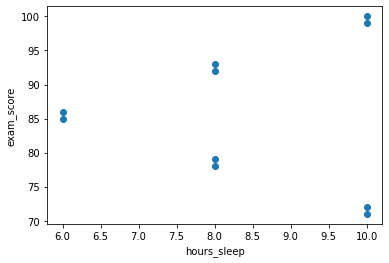

In [252]:
# Plot the relationship to show that it is nonlinear. 
plt.scatter(x_y['hours_sleep'], x_y['exam_score'])
plt.xlabel('hours_sleep')
plt.ylabel('exam_score')
plt.show()

In [253]:
## Use SelectKBest to pick out top k features w/ highest ranked scores. 
# - select features that share the MOST mutual info w/ the target variable. 
#
# - use partial, because we want to use more args than just x/y inputs
score_function = partial(mutual_info_regression, discrete_features=[0], random_state=68)

In [254]:
# select the 3 features w/ the most mutual information
selection = SelectKBest(score_func=score_function, k=3)

# use fit_transform to pass our x/y values into selection
selection.fit_transform(x_encoded, y)

array([[ 0,  1, 10],
       [ 0,  2, 10],
       [ 0,  3,  8],
       [ 1,  3,  8],
       [ 1,  3,  6],
       [ 1,  4,  6],
       [ 1,  3,  8],
       [ 2,  4,  8],
       [ 2,  5, 10],
       [ 2,  5, 10]])

In [255]:
# get the indexes and columns
x_kbest = x[x.columns[selection.get_support(indices=True)]]
x_kbest

,edu_goal,hours_study,hours_sleep
0,bachelors,1,10
1,bachelors,2,10
2,bachelors,3,8
3,masters,3,8
4,masters,3,6
5,masters,4,6
6,masters,3,8
7,phd,4,8
8,phd,5,10
9,phd,5,10
